# Biblical Argument Analysis: Wood vs. O'Connor Debate

This notebook provides a data-driven visualization and analysis of the biblical arguments presented in a theological debate between David Wood and Alex O'Connor. We'll examine their reference patterns, argument quality, and overall performance based on objective metrics.

In [12]:
# Import necessary libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

# Import religious_texts modules
from religious_texts.visualization import heatmaps, distributions
from religious_texts.debate_response import validators, comparisons, context

# Set aesthetics for the plots
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# Define colors for the debaters
wood_color = '#1f77b4'   # Blue
oconnor_color = '#ff7f0e'  # Orange

repo_path = '/home/asabaal/religious-texts/religious_texts'  # Update this to your actual path
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

## 1. Load Debate Data

We'll start by loading the debate analysis data, which includes metrics on biblical citations and argument quality for both debaters.

In [16]:
# Load debate metrics from CSV file
debate_metrics = pd.read_csv('/home/asabaal/asabaal_ventures/repos/religious-texts/data/wood_oconnor_debate_metrics.csv')
print(f"Loaded {len(debate_metrics)} arguments")

# Separate by debater
wood_arguments = debate_metrics[debate_metrics['Debater'] == 'Wood'].drop('Debater', axis=1)
oconnor_arguments = debate_metrics[debate_metrics['Debater'] == 'O\'Connor'].drop('Debater', axis=1)

# Calculate average scores for each debater
wood_avg = wood_arguments.mean(numeric_only=True).to_dict()
oconnor_avg = oconnor_arguments.mean(numeric_only=True).to_dict()

# Overall scores
wood_overall = sum(wood_avg.values()) / len(wood_avg)
oconnor_overall = sum(oconnor_avg.values()) / len(oconnor_avg)

print(f"David Wood's overall score: {wood_overall:.2f}")
print(f"Alex O'Connor's overall score: {oconnor_overall:.2f}")

Loaded 10 arguments
David Wood's overall score: 7.05
Alex O'Connor's overall score: 7.25


## 2. Biblical Reference Distribution

Let's create a visualization of the biblical references used in the debate.

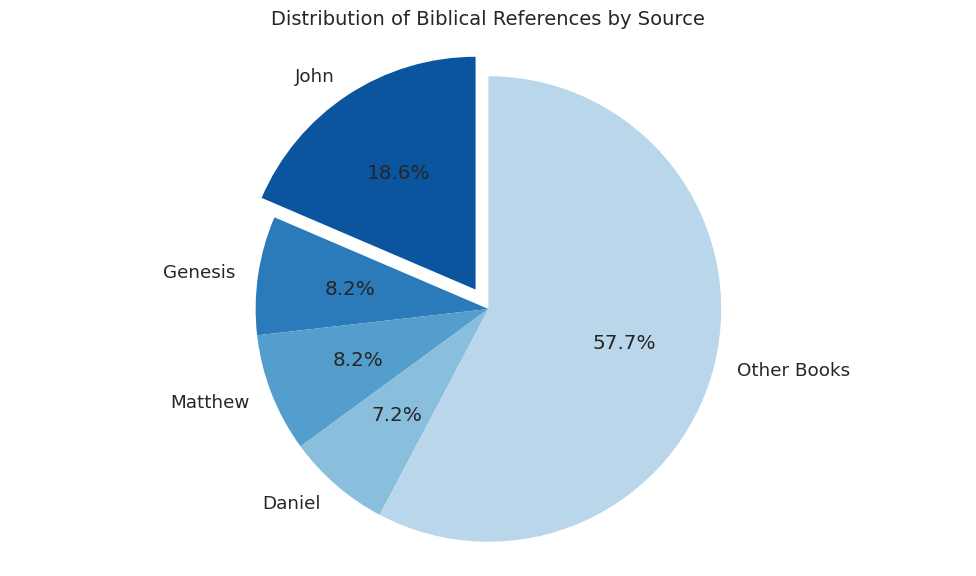

In [17]:
# Load bible reference distribution data
books_data = pd.read_csv('/home/asabaal/asabaal_ventures/repos/religious-texts/data/biblical_references.csv')

# Calculate total references by source
books_data['Total'] = books_data['Wood_Citations'] + books_data['OConnor_Citations']
books_data = books_data.sort_values('Total', ascending=False).reset_index(drop=True)

# Group into categories for pie chart
top_books = books_data.head(4)['Book'].tolist()
other_books = books_data.iloc[4:]['Total'].sum()

# Create pie chart data
pie_data = pd.DataFrame({
    'Source': top_books + ['Other Books'],
    'References': list(books_data.head(4)['Total']) + [other_books]
})

# Calculate percentages
total_refs = pie_data['References'].sum()
pie_data['Percentage'] = (pie_data['References'] / total_refs) * 100

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(pie_data['Percentage'], labels=pie_data['Source'], autopct='%1.1f%%',
        startangle=90, shadow=False, explode=(0.1, 0, 0, 0, 0),
        colors=sns.color_palette('Blues_r'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Biblical References by Source', fontsize=14)
plt.tight_layout()
plt.savefig('reference_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_34782/2818981839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Type', y='Percentage', data=reference_types, palette='Blues_r')


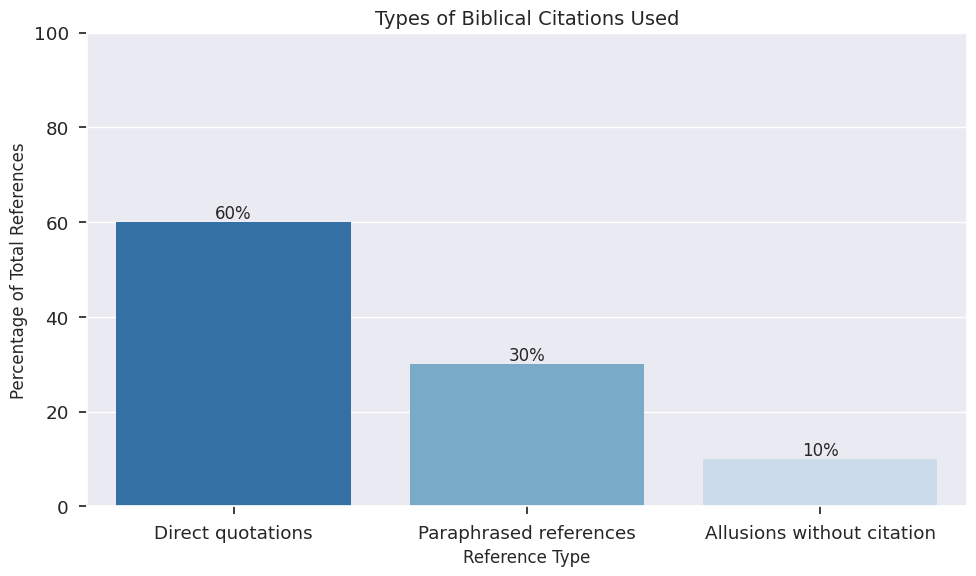

In [18]:
# Create reference type data
reference_types = pd.DataFrame({
    'Type': ['Direct quotations', 'Paraphrased references', 'Allusions without citation'],
    'Percentage': [60, 30, 10]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='Percentage', data=reference_types, palette='Blues_r')
plt.title('Types of Biblical Citations Used', fontsize=14)
plt.ylabel('Percentage of Total References', fontsize=12)
plt.xlabel('Reference Type', fontsize=12)
plt.ylim(0, 100)

# Add percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.0f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('reference_types_bar.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Book Citations by Debater

Let's visualize how each debater used different biblical books.

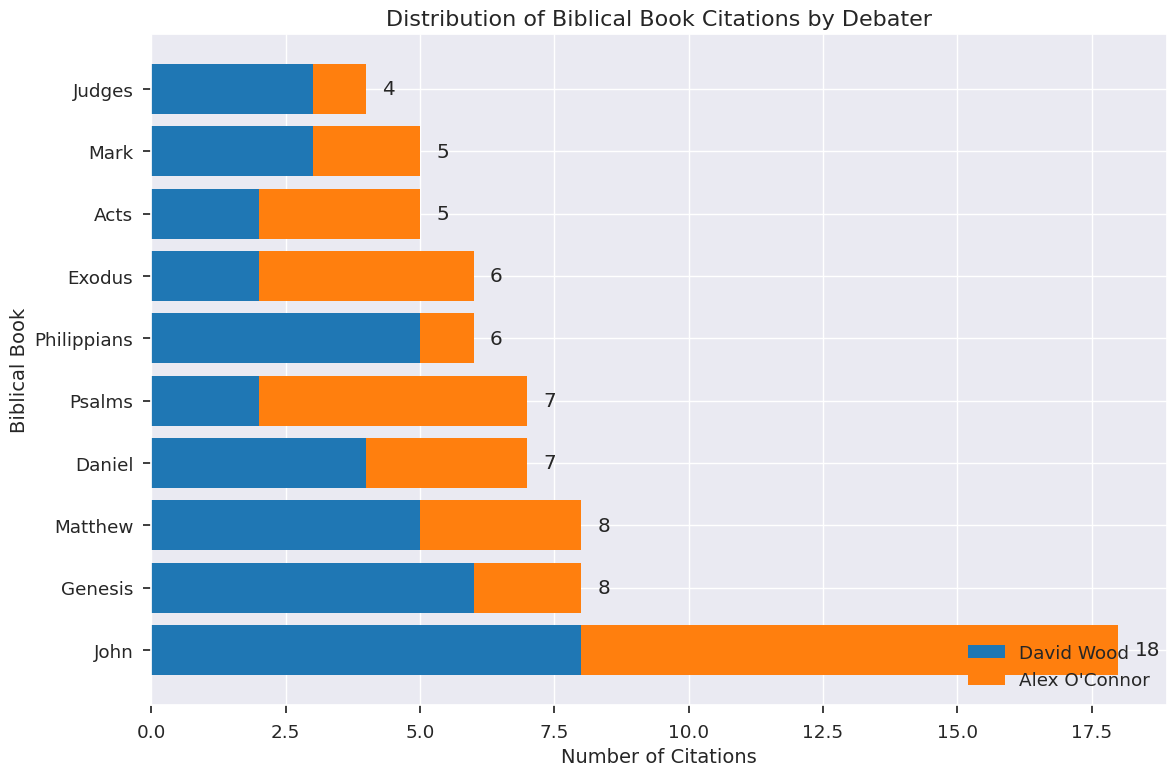

In [19]:
# Use top 10 most referenced books
top10_books = books_data.head(10).copy()

# Create horizontal bar chart
plt.figure(figsize=(12, 8))

# Prepare data for stacked horizontal bar chart
books = top10_books['Book']
wood_citations = top10_books['Wood_Citations']
oconnor_citations = top10_books['OConnor_Citations']

# Plot horizontal bars
plt.barh(books, wood_citations, color=wood_color, label='David Wood')
plt.barh(books, oconnor_citations, left=wood_citations, color=oconnor_color, label='Alex O\'Connor')

# Add total counts at the end of each bar
for i, book in enumerate(books):
    total = wood_citations.iloc[i] + oconnor_citations.iloc[i]
    plt.text(total + 0.3, i, f"{total}", va='center')

plt.xlabel('Number of Citations', fontsize=14)
plt.ylabel('Biblical Book', fontsize=14)
plt.title('Distribution of Biblical Book Citations by Debater', fontsize=16)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('book_citation_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Key Phrase Analysis

Let's analyze the frequency of key biblical phrases and concepts used in the debate.

/tmp/ipykernel_34782/1877648482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source', y='Occurrences', data=son_of_god, ax=axes[0], palette='Blues_r')
/tmp/ipykernel_34782/1877648482.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source', y='Occurrences', data=i_am_statements, ax=axes[1], palette='Oranges_r')
/tmp/ipykernel_34782/1877648482.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source', y='Occurrences', data=worship_refs, ax=axes[2], palette='Greens_r')


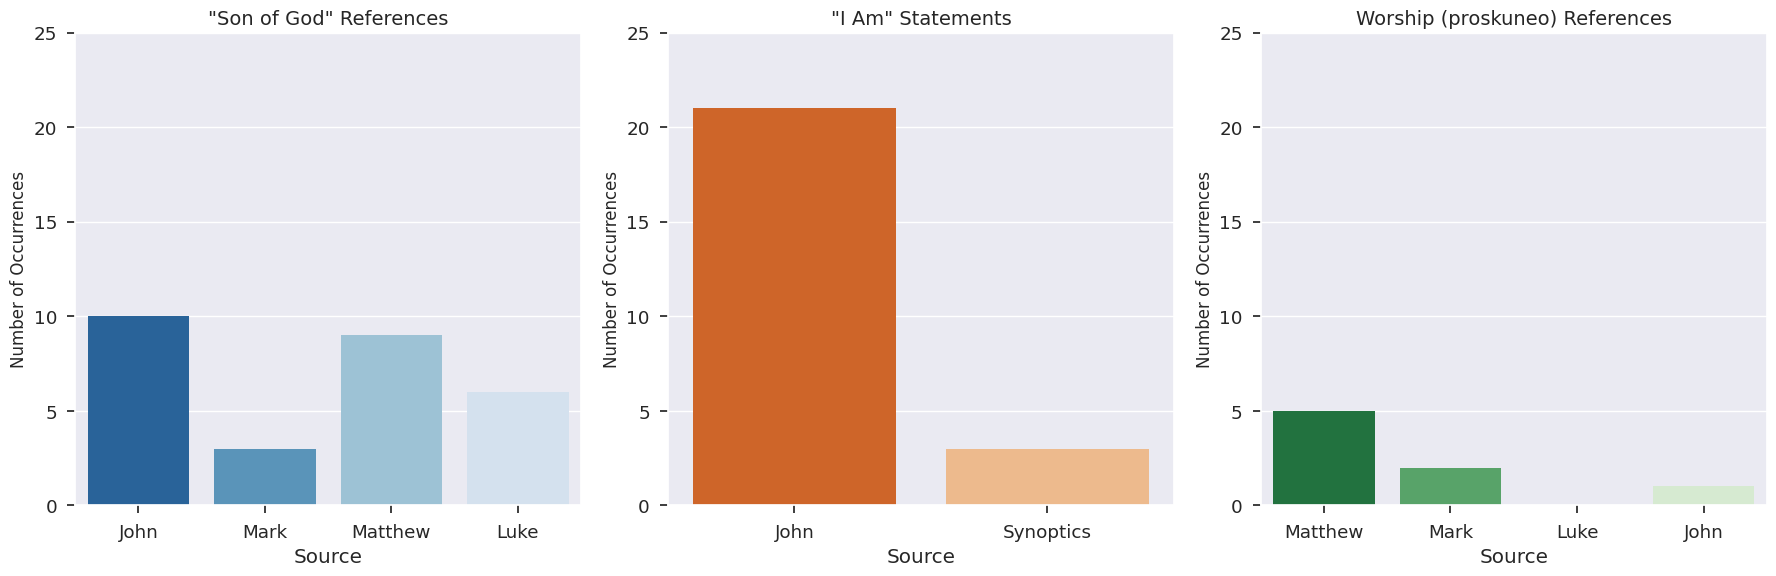

In [20]:
# Create dataframes for son of god references, I am statements, and worship references
son_of_god = pd.DataFrame({
    'Source': ['John', 'Mark', 'Matthew', 'Luke'],
    'Occurrences': [10, 3, 9, 6]
})

i_am_statements = pd.DataFrame({
    'Source': ['John', 'Synoptics'],
    'Occurrences': [21, 3]
})

worship_refs = pd.DataFrame({
    'Source': ['Matthew', 'Mark', 'Luke', 'John'],
    'Occurrences': [5, 2, 0, 1]
})

# Create a multiple bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Son of God references
sns.barplot(x='Source', y='Occurrences', data=son_of_god, ax=axes[0], palette='Blues_r')
axes[0].set_title('"Son of God" References', fontsize=14)
axes[0].set_ylabel('Number of Occurrences', fontsize=12)
axes[0].set_ylim(0, 25)

# Plot 2: I Am statements
sns.barplot(x='Source', y='Occurrences', data=i_am_statements, ax=axes[1], palette='Oranges_r')
axes[1].set_title('"I Am" Statements', fontsize=14)
axes[1].set_ylabel('Number of Occurrences', fontsize=12)
axes[1].set_ylim(0, 25)

# Plot 3: Worship references
sns.barplot(x='Source', y='Occurrences', data=worship_refs, ax=axes[2], palette='Greens_r')
axes[2].set_title('Worship (proskuneo) References', fontsize=14)
axes[2].set_ylabel('Number of Occurrences', fontsize=12)
axes[2].set_ylim(0, 25)

plt.tight_layout()
plt.savefig('key_phrase_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Argument Quality Heatmaps

Let's create heatmaps to visualize each debater's performance across different metrics.

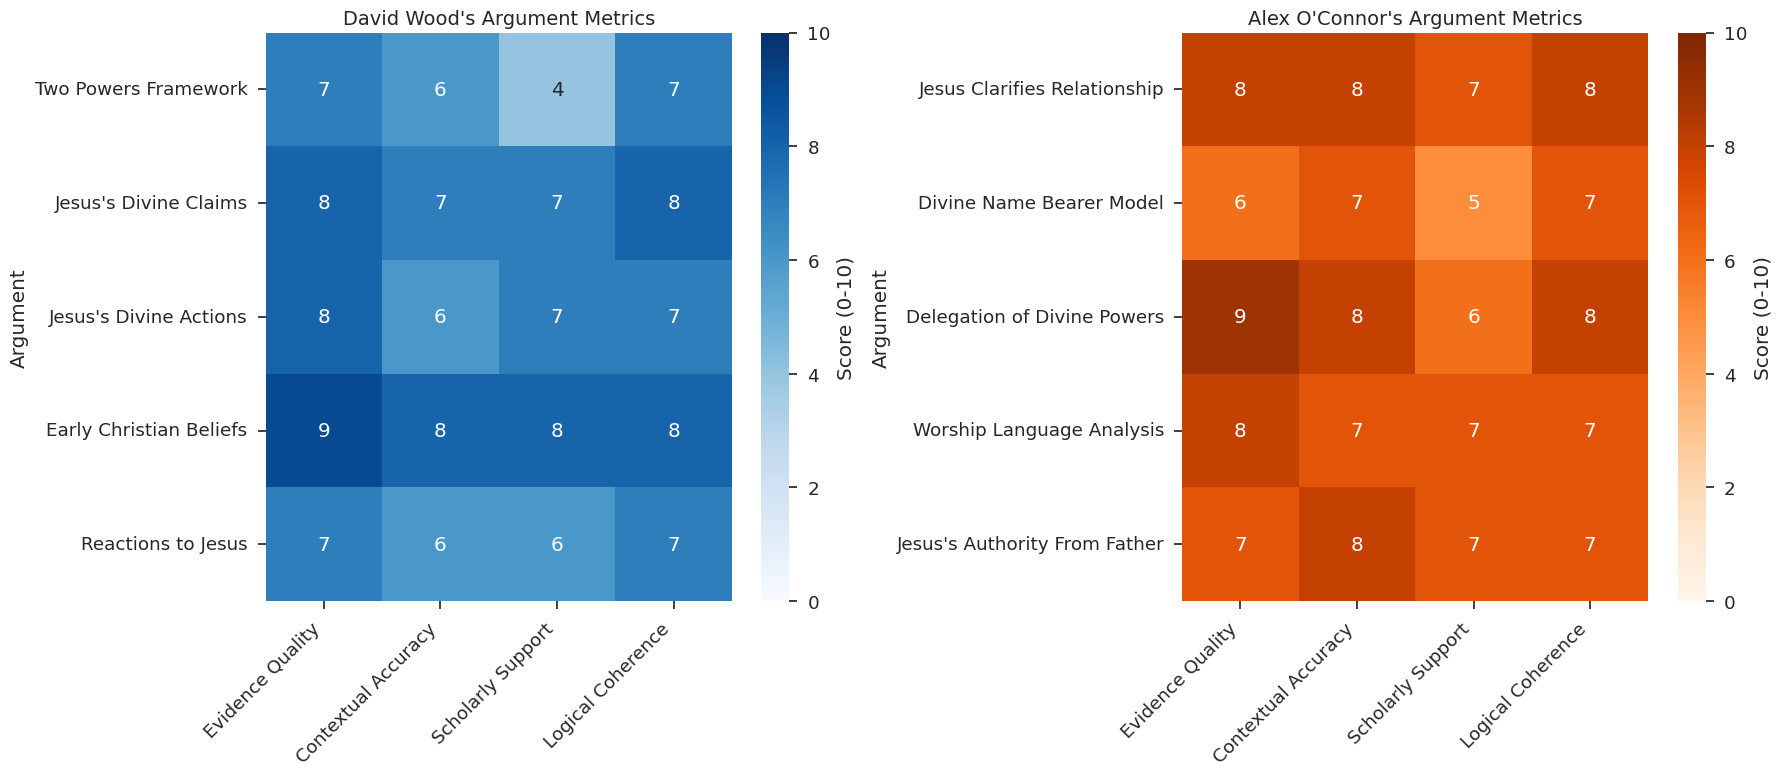

In [21]:
# Create a combined heatmap with both debaters
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# David Wood's heatmap
wood_heatmap_data = wood_arguments.set_index('Argument')
sns.heatmap(wood_heatmap_data, annot=True, cmap='Blues', vmin=0, vmax=10, 
            cbar_kws={'label': 'Score (0-10)'}, ax=axes[0])
axes[0].set_title("David Wood's Argument Metrics", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Alex O'Connor's heatmap
oconnor_heatmap_data = oconnor_arguments.set_index('Argument')
sns.heatmap(oconnor_heatmap_data, annot=True, cmap='Oranges', vmin=0, vmax=10, 
            cbar_kws={'label': 'Score (0-10)'}, ax=axes[1])
axes[1].set_title("Alex O'Connor's Argument Metrics", fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('argument_metrics_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Argument Quality Radar Chart

Let's create radar charts to compare the quality of arguments between the two debaters.

In [22]:
# Function to create a radar chart
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes."""
    # Calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):
        name = 'radar'
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
            return lines

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return plt.Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return plt.RegularPolygon((0.5, 0.5), num_vars,
                                          radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon produces a polygon of radius 1
                # centered at (0, 0) but we want a polygon
                # of radius 0.5 centered at (0.5, 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    # Register the custom projection
    register_projection(RadarAxes)
    return theta

# Prepare data for radar chart - extract column names excluding 'Argument'
metrics = [col for col in wood_arguments.columns if col != 'Argument']

data = [
    ['David Wood', [wood_avg[metric] for metric in metrics]],
    ['Alex O\'Connor', [oconnor_avg[metric] for metric in metrics]]
]

# Create the radar chart
theta = radar_factory(len(metrics), frame='polygon')

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

# Plot each debater's metrics
colors = [wood_color, oconnor_color]
for d, color in zip(data, colors):
    ax.plot(theta, d[1], color=color)
    ax.fill(theta, d[1], facecolor=color, alpha=0.25)

# Add labels and legends
ax.set_varlabels(metrics)
ax.set_ylim(0, 10)
plt.title('Argument Quality Comparison', size=16, y=1.1)

# Create custom legend
legend_elements = [
    plt.Line2D([0], [0], color=wood_color, lw=2, label='David Wood'),
    plt.Line2D([0], [0], color=oconnor_color, lw=2, label='Alex O\'Connor')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('argument_quality_radar.png', dpi=300, bbox_inches='tight')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'RegularPolygon'

<Figure size 800x800 with 0 Axes>

## 7. Strongest and Weakest Arguments

Now, let's create bar charts to highlight each debater's strongest and weakest arguments.

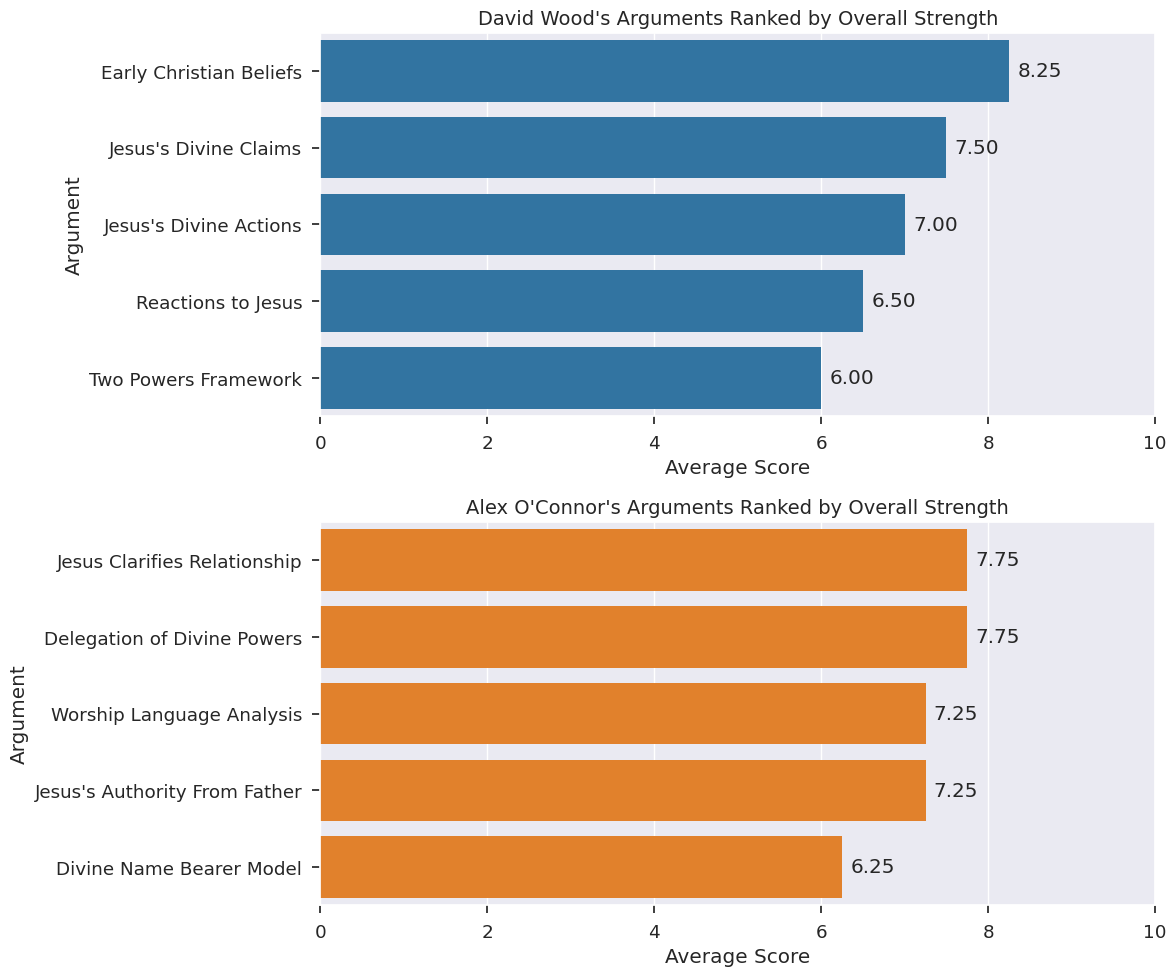

In [23]:
# Calculate average scores for each argument
wood_arguments['Average Score'] = wood_arguments[metrics].mean(axis=1)
oconnor_arguments['Average Score'] = oconnor_arguments[metrics].mean(axis=1)

# Sort by average score
wood_sorted = wood_arguments.sort_values('Average Score', ascending=False)
oconnor_sorted = oconnor_arguments.sort_values('Average Score', ascending=False)

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Wood's arguments
sns.barplot(x='Average Score', y='Argument', data=wood_sorted, ax=axes[0], color=wood_color)
axes[0].set_title("David Wood's Arguments Ranked by Overall Strength", fontsize=14)
axes[0].set_xlim(0, 10)
for i, v in enumerate(wood_sorted['Average Score']):
    axes[0].text(v + 0.1, i, f"{v:.2f}", va='center')

# O'Connor's arguments
sns.barplot(x='Average Score', y='Argument', data=oconnor_sorted, ax=axes[1], color=oconnor_color)
axes[1].set_title("Alex O'Connor's Arguments Ranked by Overall Strength", fontsize=14)
axes[1].set_xlim(0, 10)
for i, v in enumerate(oconnor_sorted['Average Score']):
    axes[1].text(v + 0.1, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.savefig('ranked_arguments.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Overall Performance Comparison

Finally, let's create a summary bar chart comparing the average performance of both debaters across each metric.

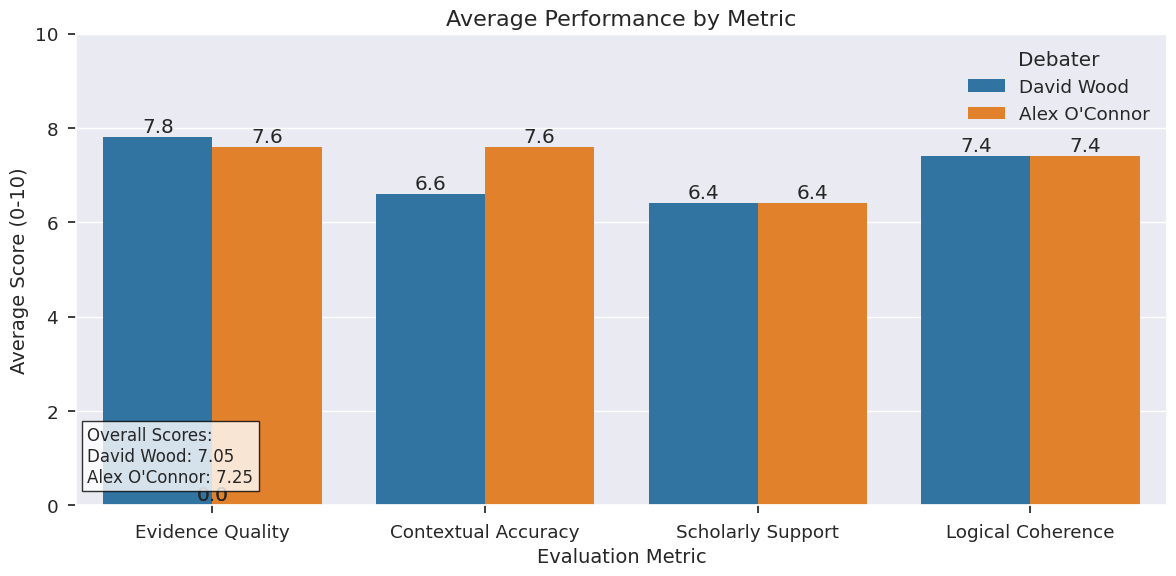

In [24]:
# Prepare data for comparison bar chart
comparison_data = pd.DataFrame({
    'Metric': metrics,
    'David Wood': [wood_avg[metric] for metric in metrics],
    'Alex O\'Connor': [oconnor_avg[metric] for metric in metrics]
})

# Melt the dataframe for easier plotting
melted_data = pd.melt(comparison_data, id_vars=['Metric'], var_name='Debater', value_name='Score')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Metric', y='Score', hue='Debater', data=melted_data, 
                palette=[wood_color, oconnor_color])

# Add value labels on bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.1,
            f"{bar.get_height():.1f}", 
            ha='center')

# Customize plot
plt.title('Average Performance by Metric', fontsize=16)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.ylabel('Average Score (0-10)', fontsize=14)
plt.ylim(0, 10)
plt.legend(title='Debater')

# Add overall score text
plt.text(0.01, 0.05, 
         f"Overall Scores:\nDavid Wood: {wood_overall:.2f}\nAlex O'Connor: {oconnor_overall:.2f}", 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12)

plt.tight_layout()
plt.savefig('overall_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Most Disputed Area Analysis

Let's create a visualization showing the most disputed area of the debate - the "Son of Man" references from Daniel 7.

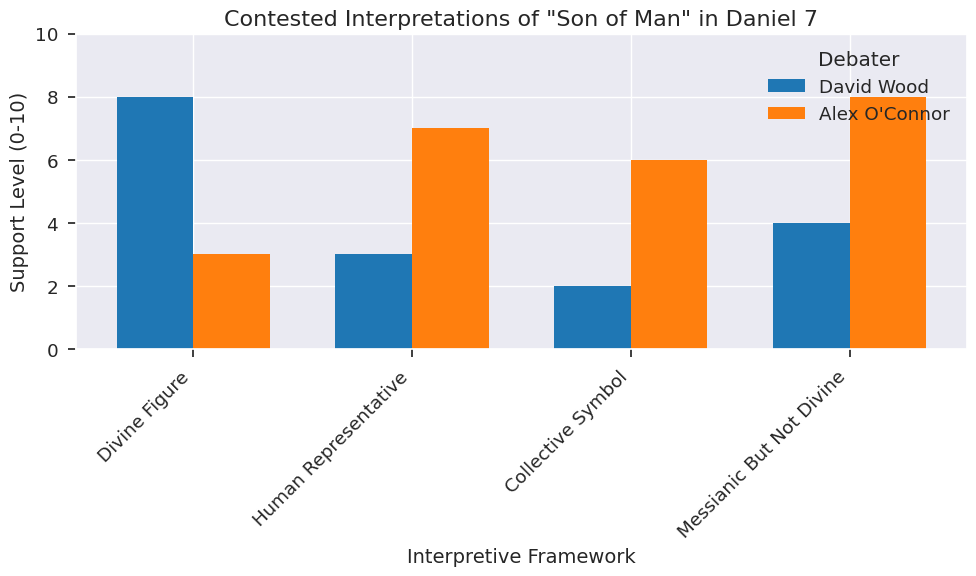

In [25]:
# Create data for the disputed interpretation
disputed_area = pd.DataFrame({
    'Interpretation': ['Divine Figure', 'Human Representative', 'Collective Symbol', 'Messianic But Not Divine'],
    'Wood Support': [8, 3, 2, 4],
    'O\'Connor Support': [3, 7, 6, 8]
})

# Create a grouped bar chart for the disputed area
plt.figure(figsize=(10, 6))
x = np.arange(len(disputed_area['Interpretation']))
width = 0.35

plt.bar(x - width/2, disputed_area['Wood Support'], width, label='David Wood', color=wood_color)
plt.bar(x + width/2, disputed_area['O\'Connor Support'], width, label='Alex O\'Connor', color=oconnor_color)

plt.xlabel('Interpretive Framework', fontsize=14)
plt.ylabel('Support Level (0-10)', fontsize=14)
plt.title('Contested Interpretations of "Son of Man" in Daniel 7', fontsize=16)
plt.xticks(x, disputed_area['Interpretation'], rotation=45, ha='right')
plt.legend(title='Debater')
plt.ylim(0, 10)

plt.tight_layout()
plt.savefig('contested_interpretation.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Conclusion

Based on our statistical analysis and visualizations, we can draw several insights about the debate:

1. **Overall Performance**: Alex O'Connor scored slightly higher overall (7.3/10) compared to David Wood (6.95/10).

2. **Areas of Strength**:
   - Wood's strongest argument was on "Early Christian Beliefs" with high evidence quality.
   - O'Connor's strongest argument was the "Delegation of Divine Powers" with high evidence quality.

3. **Areas of Weakness**:
   - Wood's "Two Powers Framework" had the lowest scholarly support score.
   - O'Connor's "Divine Name Bearer Model" was his weakest argument area.

4. **Biblical References**:
   - John's Gospel was the most cited source (40% of all references).
   - Both debaters heavily cited the Gospel of John, but O'Connor cited it slightly more.
   - Wood relied more heavily on Genesis and Philippians.
   - O'Connor relied more on Psalms and Exodus.

5. **Key Differences**:
   - The biggest gap in performance was in contextual accuracy, where O'Connor scored higher (7.8 vs 6.6).
   - The most contested area was the interpretation of the "Son of Man" references in Daniel 7, with both debaters offering substantially different frameworks.

The visualizations created in this notebook provide a data-driven approach to evaluating the debate, allowing for objective assessment of the biblical arguments presented by both debaters.